In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv(r"..\synthetic data\tourists_features.csv",index_col=0)


In [9]:
df.columns

Index(['REGON', 'OKRES', 'RO', 'WON', 'POW', 'GMN', 'KKR', 'D8R01', 'D8R02',
       'D8R1', 'year', 'month', 'date', 'quarter', 'D8R1_mean_gmn',
       'D8R1_mean_pow', 'D8R1_mean_won', 'D8R1_quarter_mean', 'mean_3m',
       'mean_6m', 'mean_9m', 'mean_12m'],
      dtype='object')

In [30]:
# --- 1. Columns to exclude from the model ---
cols_to_drop = ['REGON','D8R1', 'WON', 'POW', 'GMN', 'D8R01', 'D8R02','date']

In [31]:
# --- 2. List to store summary results ---
results = []


MODEL FOR KKR = 276
Model parameters:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Number of leaves: 27
Tree depth: 5
Mean Squared Error (MSE): 8701.75
R²: 0.326


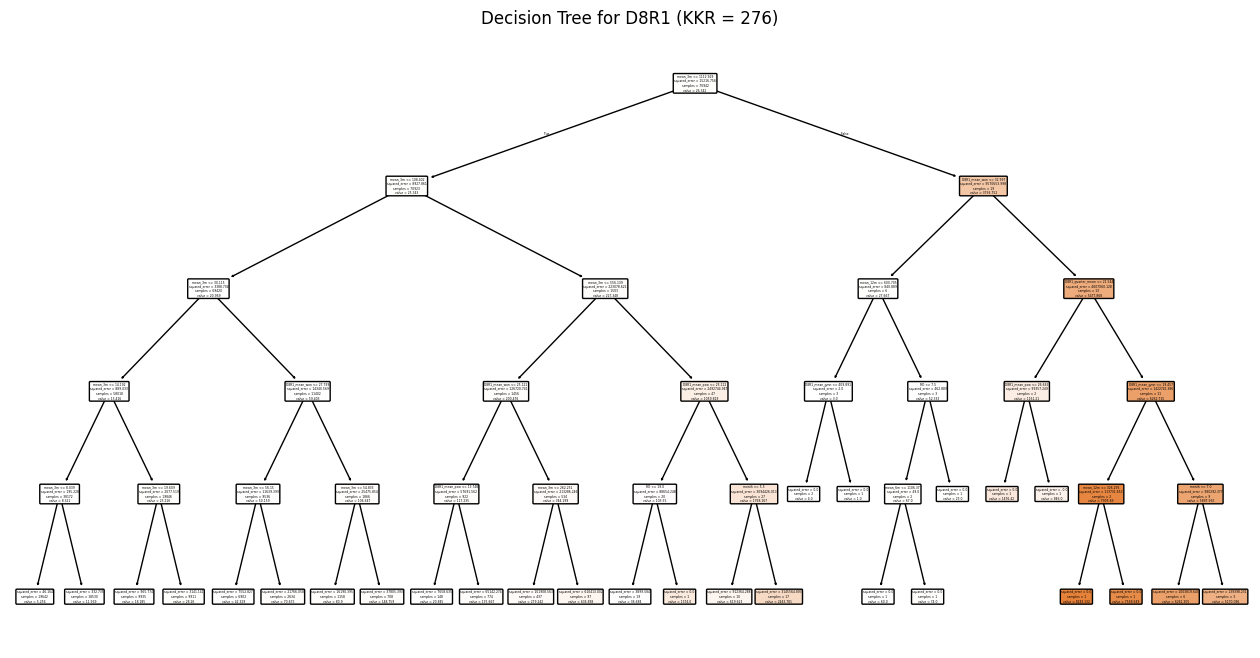


MODEL FOR KKR = 643
Model parameters:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Number of leaves: 27
Tree depth: 5
Mean Squared Error (MSE): 3102.54
R²: -0.606


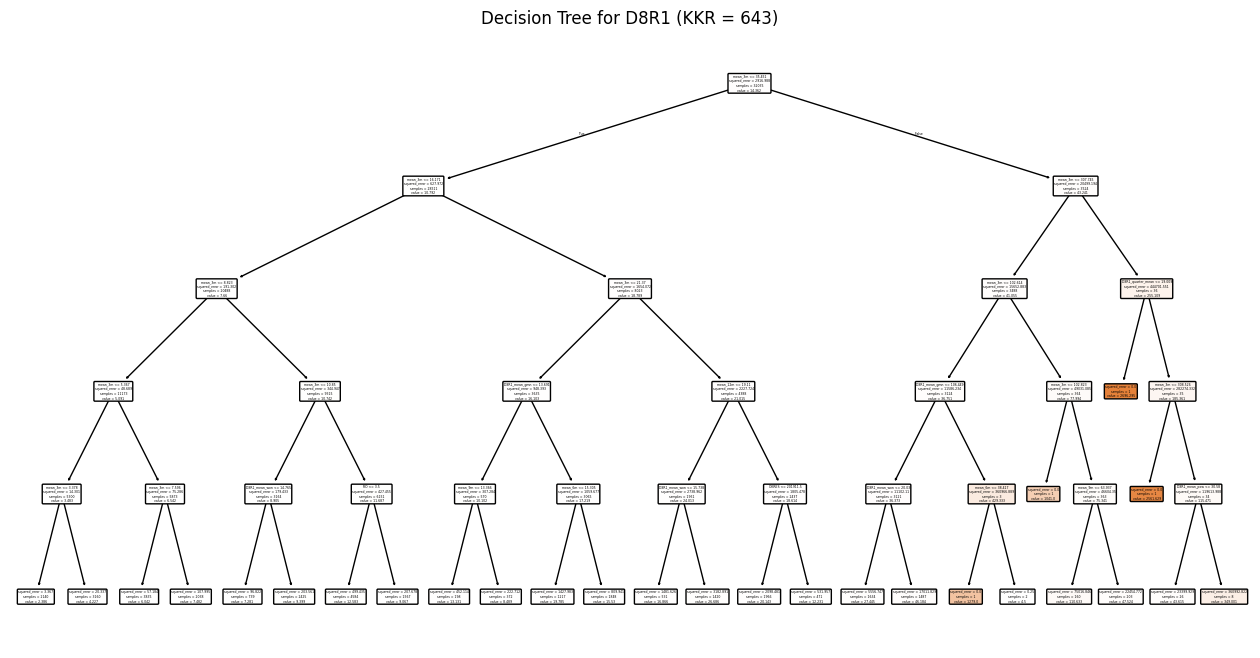


MODEL FOR KKR = 804
Model parameters:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Number of leaves: 27
Tree depth: 5
Mean Squared Error (MSE): 3865.91
R²: -0.217


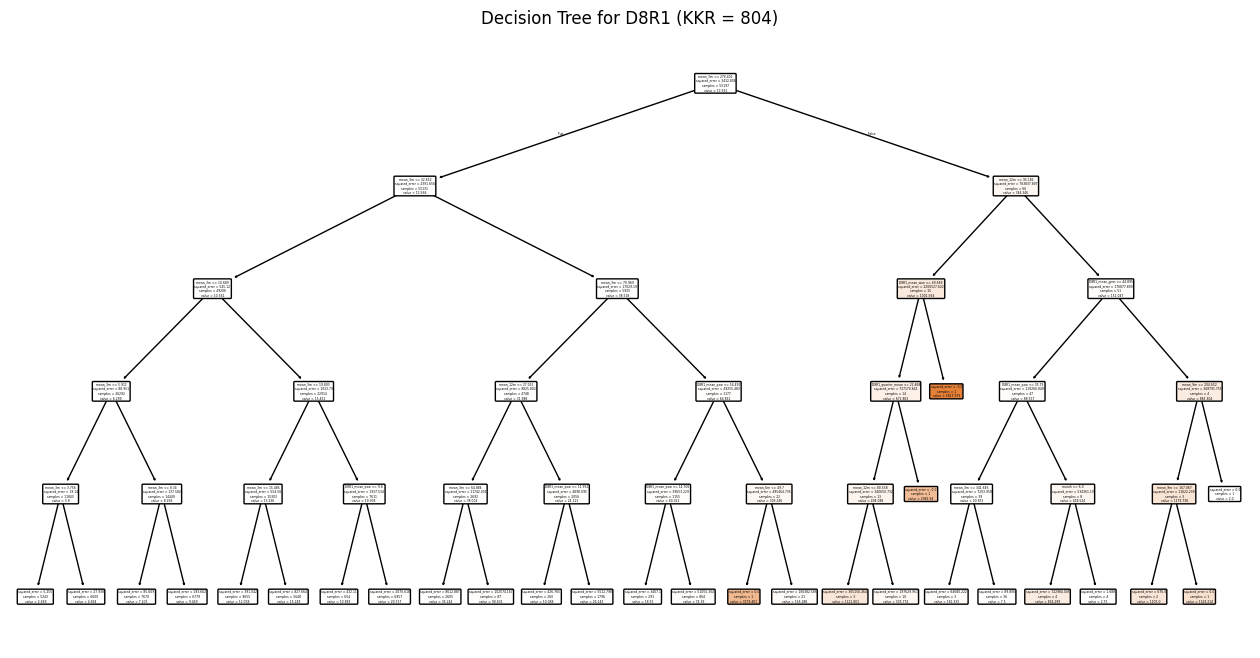


MODEL FOR KKR = 826
Model parameters:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Number of leaves: 32
Tree depth: 5
Mean Squared Error (MSE): 3395.82
R²: 0.304


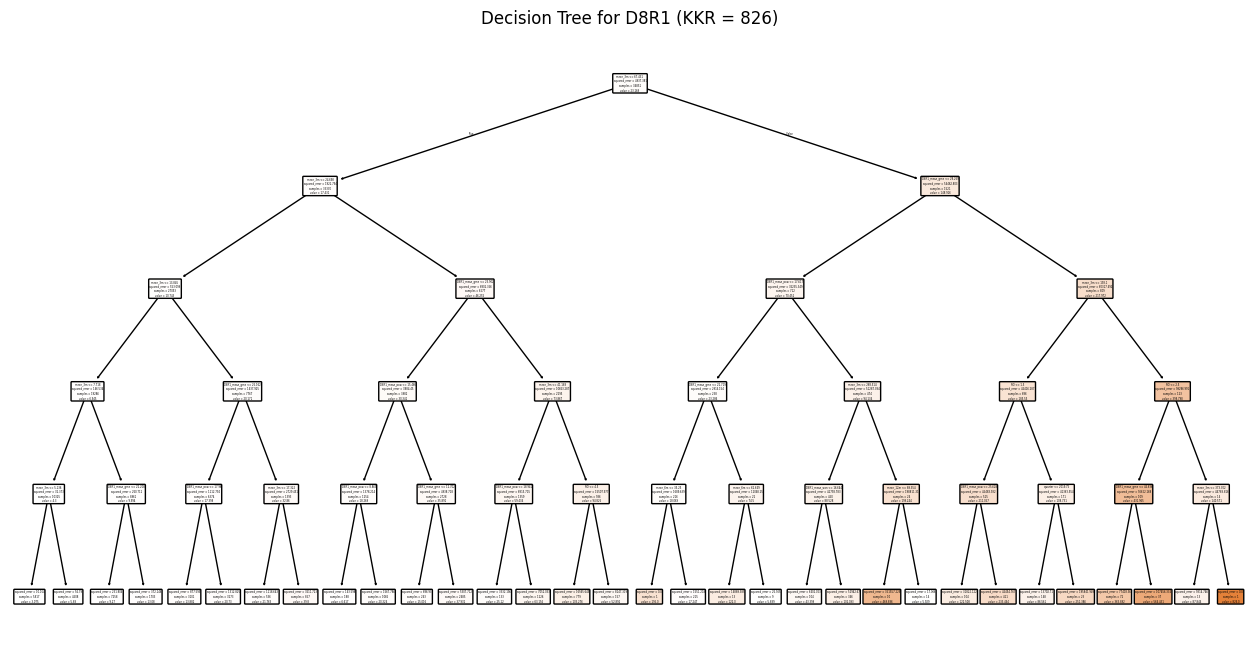


MODEL FOR KKR = 840
Model parameters:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Number of leaves: 29
Tree depth: 5
Mean Squared Error (MSE): 4392.11
R²: 0.269


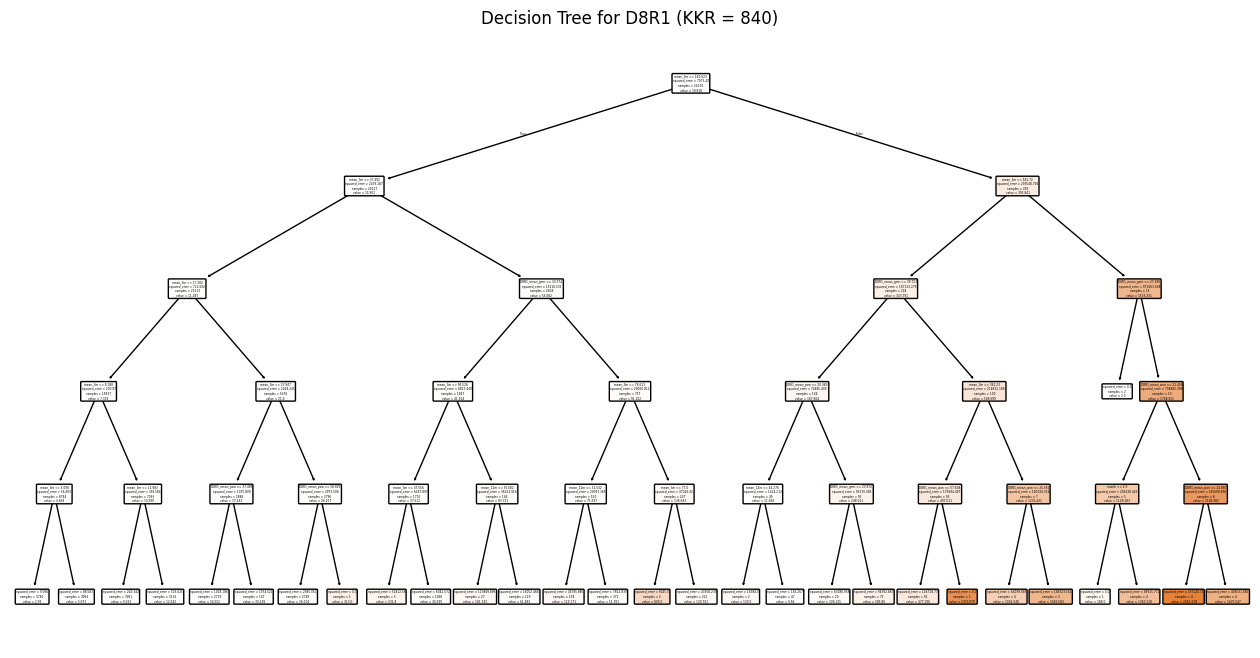


=== SUMMARY OF DECISION TREE MODELS BY KKR ===
   KKR  n_leaves  depth      MSE     R2
0  276        27      5  8701.75  0.326
1  643        27      5  3102.54 -0.606
2  804        27      5  3865.91 -0.217
3  826        32      5  3395.82  0.304
4  840        29      5  4392.11  0.269


In [32]:

# --- 3. Loop through each unique KKR value ---
for kkr_value in df['KKR'].unique():
    print(f"\n{'='*40}")
    print(f"MODEL FOR KKR = {kkr_value}")
    print(f"{'='*40}")
    
    # Filter data for a specific KKR
    df_kkr = df[df['KKR'] == kkr_value].copy()
    
    # --- Remove missing values in the dependent variable ---
    df_kkr = df_kkr.dropna(subset=['D8R1'])
    
    # Skip if there are too few records
    if len(df_kkr) < 10:
        print("Too few observations – skipping.")
        continue

    # Define independent (X) and dependent (y) variables
    X = df_kkr.drop(columns=cols_to_drop, errors='ignore')
    y = df_kkr['D8R1']

    # Remove missing values in features
    X = X.dropna(axis=0)
    y = y.loc[X.index]

    if len(X) < 5:
        print("Too few data points after cleaning – skipping.")
        continue

    # --- 4. Split into training and test sets ---
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # --- 5. Build the decision tree model ---
    model = DecisionTreeRegressor(max_depth=5, random_state=42)
    model.fit(X_train, y_train)

    # --- 6. Predictions and evaluation ---
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # --- 7. Print model parameters and results ---
    print("Model parameters:")
    print(model.get_params())
    print(f"Number of leaves: {model.get_n_leaves()}")
    print(f"Tree depth: {model.get_depth()}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R²: {r2:.3f}")

    # --- 8. Save model summary for later analysis ---
    results.append({
        'KKR': kkr_value,
        'n_leaves': model.get_n_leaves(),
        'depth': model.get_depth(),
        'MSE': round(mse, 2),
        'R2': round(r2, 3)
    })

    # --- 9. Plot the decision tree ---
    plt.figure(figsize=(16, 8))
    plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
    plt.title(f"Decision Tree for D8R1 (KKR = {kkr_value})")
    plt.show()

# --- 10. Display summary table ---
results_df = pd.DataFrame(results)
print("\n=== SUMMARY OF DECISION TREE MODELS BY KKR ===")
print(results_df)


Dependent variable: D8R1 represents the number of nights spent by foreign tourists in each KKR region.

R² values:

Positive values (e.g., 0.326 for KKR 276) indicate that the model explains some variation in tourist nights — roughly 32.6% of the variability in tourist stays for that region.

Negative values (e.g., -0.606 for KKR 643) indicate that the model performs worse than a simple mean prediction. This suggests either:

Very high variability in tourist nights in that region, or

The selected features are not informative enough for predicting stays in this KKR.

MSE (Mean Squared Error):

Measures average squared difference between predicted and actual number of nights.

High MSE (e.g., 8701.75 for KKR 276) means predictions can be far from actual nights.

Lower MSE (e.g., 3102.54 for KKR 643) does not guarantee a good fit if R² is negative — it just reflects absolute errors.

Tree complexity:

Depth = 5 and ~27–32 leaves across all models. This means the trees split tourists into ~30 groups based on features like time of year, region characteristics, or other available predictors.

Despite this, models for some regions (KKR 643 and 804) are not capturing the patterns well, likely due to high variance in tourist behavior.

Regional variability: Some regions have highly predictable tourist stay patterns (KKR 276), while others are much harder to predict (KKR 643, 804).

Model limitations: Decision trees of depth 5 may be too simple to capture complex patterns in regions with large variations in nights spent.

Next steps:

Consider increasing tree depth or using ensemble methods (Random Forest, Gradient Boosting) for better prediction.

Analyze feature importance to see which factors drive the number of nights tourists stay.

Examine outliers — extremely long or short stays can distort model performance.